# forcastin Airlines Passengers:

In [2]:
#Forecast the CocaCola prices and Airlines Passengers data set.
#Prepare a document for each model explaining .how many dummy variables you have created and RMSE value 
#for each model Finally which model you will use for Forecasting.

In [266]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [267]:
import pandas as pd
import numpy as np
import matplotlib.pyplot
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import statsmodels.graphics.tsaplots as tsa_plots
import statsmodels.tsa.statespace as tm_models
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf
from datetime import datetime,time
import warnings
import itertools
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib
from pylab import rcParams
import pmdarima

In [309]:
df = pd.read_excel("C:\\Users\\hp\\Downloads\\Airlines+Data.xlsx")
df.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [310]:
df1=df.copy()
df1.head(3)

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132


In [311]:
df1.isnull().sum()

Month         0
Passengers    0
dtype: int64

In [312]:
df1.dtypes

Month         datetime64[ns]
Passengers             int64
dtype: object

In [313]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Passengers,96.0,213.708333,71.918216,104.0,156.0,200.0,264.75,413.0


In [314]:
df1 = df1.set_index('Month')

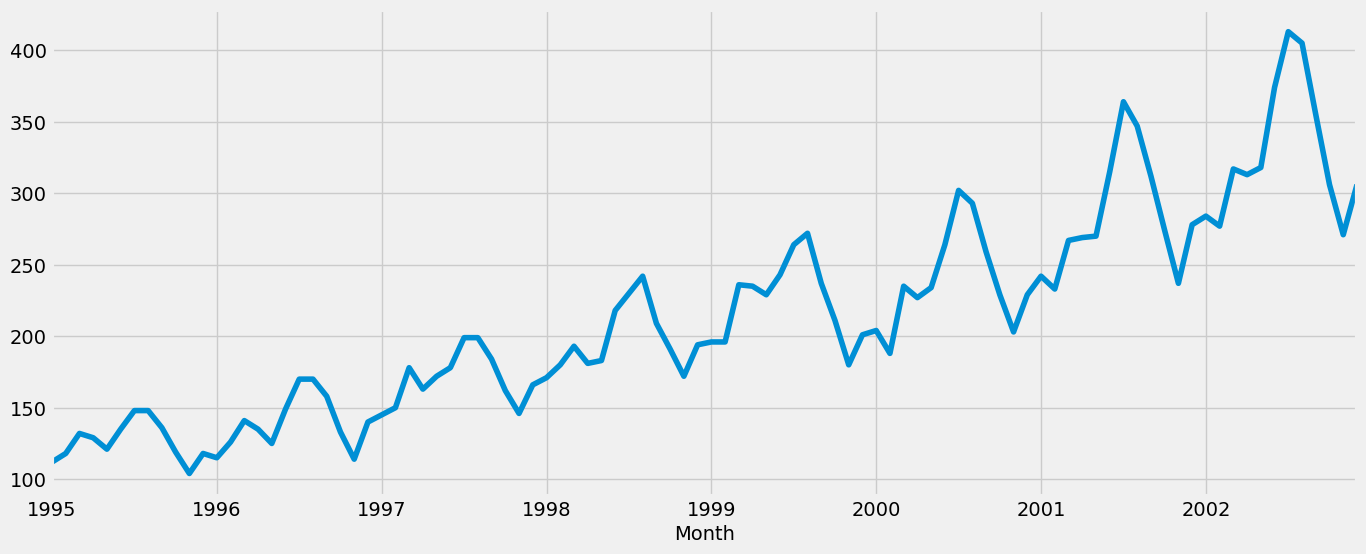

In [315]:
df1['Passengers'].plot(figsize=(15, 6))
plt.show()

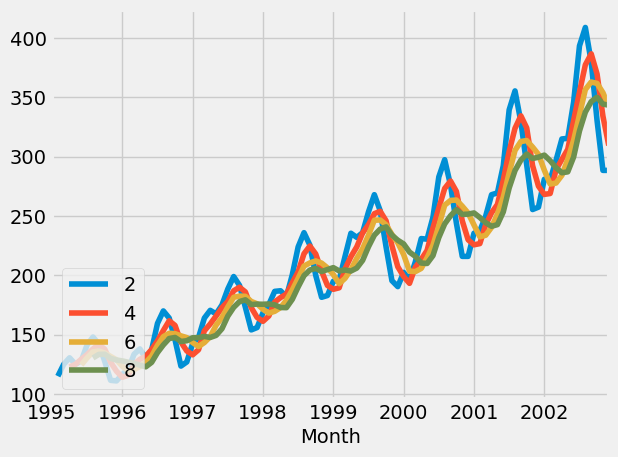

In [316]:
for i in range(2,10,2):
    df1['Passengers'].rolling(i).mean().plot(label=str(i))
plt.legend(loc=3)

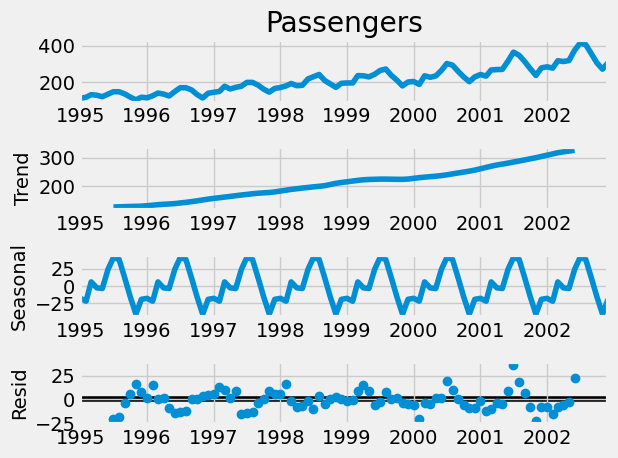

In [317]:
ts_add = seasonal_decompose(df1['Passengers'],model="additive")
fig = ts_add.plot()
plt.show()

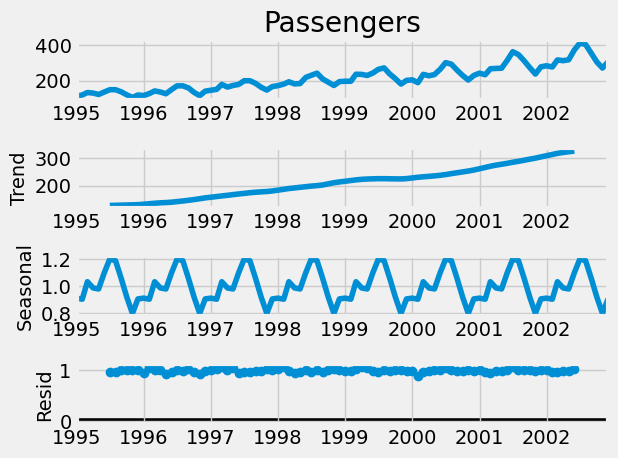

In [318]:
ts_mul = seasonal_decompose(df1.Passengers,model="multiplicative")
fig = ts_mul.plot()
plt.show()

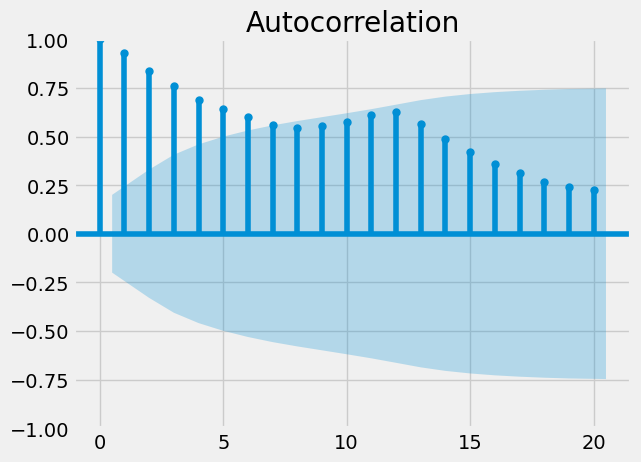

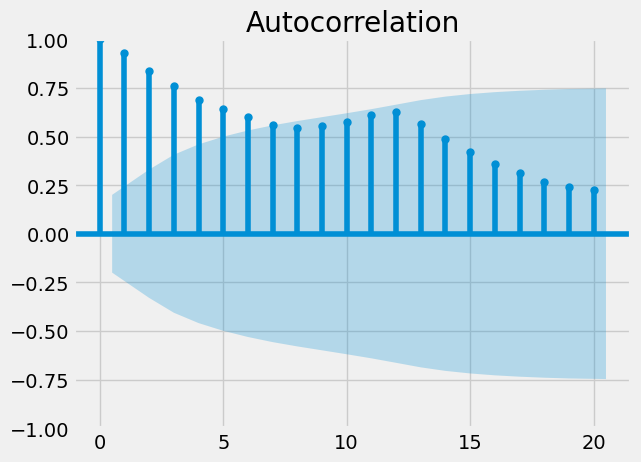

In [319]:
tsa_plots.plot_acf(df1['Passengers'])

In [320]:
#building time series forcasting with arima
X = df1['Passengers'].values

In [321]:
size = int(len(X) * 0.66)

In [322]:
train, test = X[0:size], X[size:len(X)]

In [323]:
from statsmodels.tsa.arima.model import ARIMA
model =ARIMA(train,order=(5,1,0))

In [324]:
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   63
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -263.583
Date:                Fri, 24 Nov 2023   AIC                            539.167
Time:                        02:54:54   BIC                            551.929
Sample:                             0   HQIC                           544.178
                                 - 63                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1062      0.160      0.663      0.507      -0.208       0.420
ar.L2         -0.1976      0.170     -1.159      0.246      -0.532       0.136
ar.L3         -0.0706      0.126     -0.562      0.5

                0
count   63.000000
mean     4.228944
std     21.710779
min    -32.213037
25%    -10.165143
50%      0.616449
75%     15.360977
max    112.000000


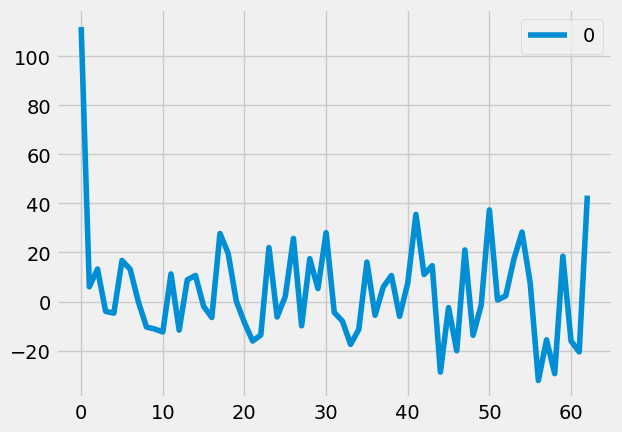

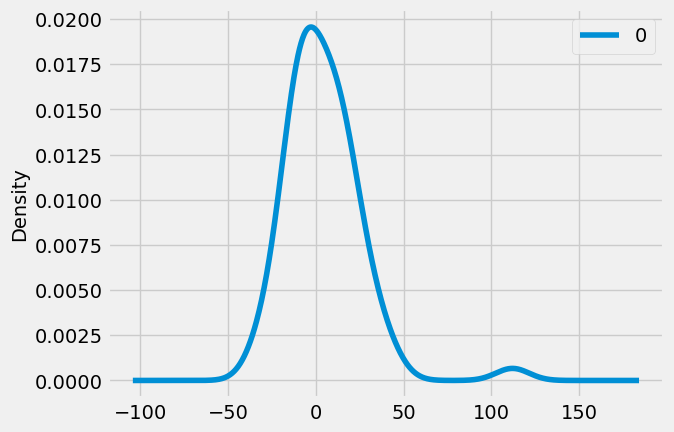

In [325]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
residuals.plot(kind='kde')
print(residuals.describe())

In [326]:
#The plot of the residual errors suggests that there may still be some trend information not captured by the model
#The results show that there is no a bias in the prediction (a zero mean in the residuals)

In [327]:
history = [x for x in train]

In [328]:
predictions = list()

In [329]:
from statsmodels.tsa.arima.model import ARIMA
for t in range(len(test)):
    model = ARIMA(history,order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=237.351697, expected=227.000000
predicted=218.673588, expected=234.000000
predicted=235.603571, expected=264.000000
predicted=250.751821, expected=302.000000
predicted=306.236426, expected=293.000000
predicted=283.001988, expected=259.000000
predicted=247.529991, expected=229.000000
predicted=224.116737, expected=203.000000
predicted=207.700690, expected=229.000000
predicted=249.298532, expected=242.000000
predicted=248.869263, expected=233.000000
predicted=231.312583, expected=267.000000
predicted=266.498530, expected=269.000000
predicted=259.866113, expected=270.000000
predicted=269.604000, expected=315.000000
predicted=312.657188, expected=364.000000
predicted=368.277208, expected=347.000000
predicted=332.664432, expected=312.000000
predicted=298.257405, expected=274.000000
predicted=262.776570, expected=237.000000
predicted=240.179592, expected=278.000000
predicted=308.214176, expected=284.000000
predicted=287.379158, expected=277.000000
predicted=281.188134, expected=317

In [330]:
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)


Test MSE: 792.015


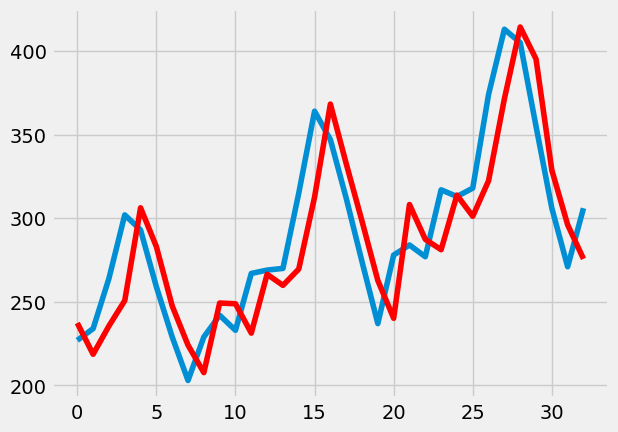

In [331]:
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [332]:
df2 = df.copy()

In [333]:
df2 = pd.get_dummies(df2,columns = ['Month'])

In [375]:
df2.rename(columns={'Month_1995-01-01 00:00:00': 'Month_1', 'Month_1995-02-01 00:00:00': 'Month_2','Month_1995-03-01 00:00:00':'Month_3','Month_1995-04-01 00:00:00' : 'Month_4'
                   ,'Month_5':'Month_5','Month_1995-06-01 00:00:00':'Month_6','Month_1995-07-01 00:00:00':'Month_7',
                   'Month_1995-08-01 00:00:00':'Month_8','Month_1995-09-01 00:00:00':'Month_9','Month_1995-10-01 00:00:00':'10',
                   'Month_1995-11-01 00:00:00':'Month_11','Month_1995-12-01 00:00:00':'Month_12'}, inplace=True)
df2.head()

,Passengers,Month_1,Month_2,Month_5,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,...,Month_2002-06-01 00:00:00,Month_2002-07-01 00:00:00,Month_2002-08-01 00:00:00,Month_2002-09-01 00:00:00,Month_2002-10-01 00:00:00,Month_2002-11-01 00:00:00,Month_2002-12-01 00:00:00,t,t_sq,log_Passengers
0,112,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,4.718499
1,118,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,4,4.770685
2,132,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,9,4.882802
3,129,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,4,16,4.859812
4,121,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,5,25,4.795791


In [355]:
df2.shape

(96, 100)

In [356]:
t= np.arange(1,97)

In [357]:
df2['t'] = t

In [358]:
df2['t_sq'] = df2['t']*df2['t']

In [359]:
log_Passengers=np.log(df2['Passengers'])

In [360]:
df2['log_Passengers']=log_Passengers

In [376]:
df2

,Passengers,Month_1,Month_2,Month_5,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,...,Month_2002-06-01 00:00:00,Month_2002-07-01 00:00:00,Month_2002-08-01 00:00:00,Month_2002-09-01 00:00:00,Month_2002-10-01 00:00:00,Month_2002-11-01 00:00:00,Month_2002-12-01 00:00:00,t,t_sq,log_Passengers
0,112,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,4.718499
1,118,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,4,4.770685
2,132,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,9,4.882802
3,129,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,4,16,4.859812
4,121,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,5,25,4.795791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,405,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,92,8464,6.003887
92,355,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,93,8649,5.872118
93,306,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,94,8836,5.723585
94,271,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,95,9025,5.602119


In [377]:
train1, test1 = np.split(df2, [int(.67 *len(df2))])
linear= smf.ols('Passengers ~ t',data=train1).fit()
predlin=pd.Series(linear.predict(pd.DataFrame(test1['t'])))
rmselin=np.sqrt((np.mean(np.array(test1['Passengers'])-np.array(predlin))**2))
rmselin


25.503983516483537

In [378]:
quad=smf.ols('Passengers~t+t_sq',data=train1).fit()
predquad=pd.Series(quad.predict(pd.DataFrame(test1[['t','t_sq']])))
rmsequad=np.sqrt(np.mean((np.array(test1['Passengers'])-np.array(predquad))**2))
rmsequad

53.18955514415421

In [379]:
expo=smf.ols('Passengers~t',data=train1).fit()
predexp=pd.Series(expo.predict(pd.DataFrame(test1['t'])))
rmseexpo=np.sqrt(np.mean((np.array(test1['Passengers'])-np.array(np.exp(predexp)))**2))
rmseexpo

1.603094593327857e+128

In [384]:
additive= smf.ols('Passengers~ Month_1+Month_2+Month_4+Month_6+Month_7+Month_8+Month_9+Month_11+Month_12',data=train1).fit()
predadd=pd.Series(additive.predict(pd.DataFrame(test1[['Month_1','Month_2','Month_4','Month_6','Month_7','Month_8','Month_9','Month_11','Month_12']])))
rmseadd=np.sqrt(np.mean((np.array(test1['Passengers'])-np.array(predadd))**2))
rmseadd


121.63511082722137

In [387]:
addlinear= smf.ols('Passengers~ Month_1+Month_2+Month_4+Month_6+Month_7+Month_8+Month_9+Month_11+Month_12',data=train1).fit()
predaddlinear=pd.Series(addlinear.predict(pd.DataFrame(test1[['t','Month_1','Month_2','Month_4','Month_6','Month_7','Month_8','Month_9','Month_11','Month_12']])))
rmseaddlinear=np.sqrt(np.mean((np.array(test1['Passengers'])-np.array(predaddlinear))**2))
rmseaddlinear


121.63511082722137

In [388]:
addquad=smf.ols('Passengers~t+t_sq+Month_1+Month_2+Month_4+Month_6+Month_7+Month_8+Month_9+Month_11+Month_12',data=train1).fit()
predaddquad=pd.Series(addquad.predict(pd.DataFrame(test1[['t','t_sq','Month_1','Month_2','Month_4','Month_6','Month_7','Month_8','Month_9','Month_11','Month_12']])))
rmseaddquad=np.sqrt(np.mean((np.array(test1['Passengers'])-np.array(predaddquad))**2))
rmseaddquad

63.065541640923364

In [389]:
mulsea=smf.ols('log_Passengers~Month_1+Month_2+Month_4+Month_6+Month_7+Month_8+Month_9+Month_11+Month_12',data=train1).fit()
predmul= pd.Series(mulsea.predict(pd.DataFrame(test1[['Month_1','Month_2','Month_4','Month_6','Month_7','Month_8','Month_9','Month_11','Month_12']])))
rmsemul= np.sqrt(np.mean((np.array(test1['Passengers'])-np.array(np.exp(predmul)))**2))
rmsemul

125.61263743145373

In [390]:
mulsea=smf.ols('log_Passengers~Month_1+Month_2+Month_4+Month_6+Month_7+Month_8+Month_9+Month_11+Month_12',data=train1).fit()
predmul= pd.Series(mulsea.predict(pd.DataFrame(test1[['Month_1','Month_2','Month_4','Month_6','Month_7','Month_8','Month_9','Month_11','Month_12']])))
rmsemul= np.sqrt(np.mean((np.array(test1['Passengers'])-np.array(np.exp(predmul)))**2))
rmsemul

125.61263743145373

In [391]:
mullin= smf.ols('log_Passengers~t+Month_1+Month_2+Month_4+Month_6+Month_7+Month_8+Month_9+Month_11+Month_12',data=train1).fit()
predmullin= pd.Series(mullin.predict(pd.DataFrame(test1[['t','Month_1','Month_2','Month_4','Month_6','Month_7','Month_8','Month_9','Month_11','Month_12']])))
rmsemulin=np.sqrt(np.mean((np.array(test1['Passengers'])-np.array(np.exp(predmullin)))**2))
rmsemulin

40.90898287193857

In [392]:
mul_quad= smf.ols('log_Passengers~t+t_sq+Month_1+Month_2+Month_4+Month_6+Month_7+Month_8+Month_9+Month_11+Month_12',data=train1).fit()
pred_mul_quad= pd.Series(mul_quad.predict(test1[['t','t_sq','Month_1','Month_2','Month_4','Month_6','Month_7','Month_8','Month_9','Month_11','Month_12']]))
rmse_mul_quad=np.sqrt(np.mean((np.array(test1['Passengers'])-np.array(np.exp(pred_mul_quad)))**2))
rmse_mul_quad

70.92410766013903

In [393]:
output = {'Model':pd.Series(['rmse_mul_quad','rmseadd','rmseaddlinear','rmseaddquad','rmseexpo','rmselin','rmsemul','rmsemulin','rmsequad']),
          'Values':pd.Series([rmse_mul_quad,rmseadd,rmseaddlinear,rmseaddquad,rmseexpo,rmselin,rmsemul,rmsemulin,rmsequad])}


In [394]:
rmse=pd.DataFrame(output)

In [395]:
print(rmse)

           Model         Values
0  rmse_mul_quad   7.092411e+01
1        rmseadd   1.216351e+02
2  rmseaddlinear   1.216351e+02
3    rmseaddquad   6.306554e+01
4       rmseexpo  1.603095e+128
5        rmselin   2.550398e+01
6        rmsemul   1.256126e+02
7      rmsemulin   4.090898e+01
8       rmsequad   5.318956e+01


In [396]:
#Multiplicative seasonality with linear trend has the best RMSE value